In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
file_path = 'abc.xlsx'  
data = pd.read_excel(file_path)

In [5]:
# Drop unnecessary columns (e.g., 'customer_id', 'phone_no')
data = data.drop(['customer_id', 'phone_no'], axis=1)

# Encode categorical columns (e.g., 'gender', 'multi_screen', 'mail_subscribed')
label_encoders = {}
for column in ['gender', 'multi_screen', 'mail_subscribed']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
# Define features (X) and target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the Naive Bayes Classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred = nb_clf.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.33
Recall: 0.40
F1 Score: 0.37


In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[315  38]
 [ 28  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       353
           1       0.33      0.40      0.37        47

    accuracy                           0.83       400
   macro avg       0.63      0.65      0.64       400
weighted avg       0.85      0.83      0.84       400



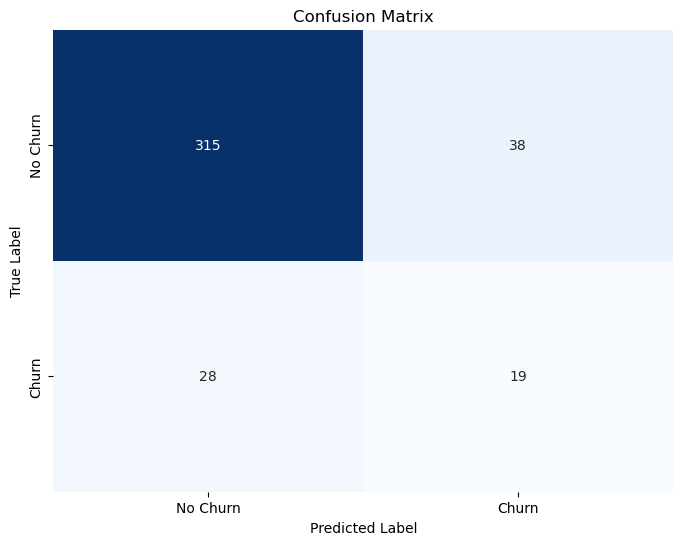

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from previous code
# For example:
# y_test = [actual labels from test data]
# y_pred = [predicted labels from model]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()